<a href="https://colab.research.google.com/github/codestates/ds-section1-sprint3-new/blob/main/n132%20-%20PCA/n132%20-%20PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 2*

---

<br>

# PCA

## 🏆 학습 목표 

- 공분산, 상관계수의 목적과 차이점을 설명할 수 있다.
- Vector transformation에 대해서 이해한다. 
- eigenvector / eigenvalue를 설명할 수 있다.
- linear projection에 대해서 이해한다. 
- High dimensional data의 문제점을 이해하고, 이를 handling 하기 위한 방법을 설명할 수 있다.
- PCA의 목적과 기본원리를 설명할 수 있다.

---

# ✂️ **Note: 차원 축소(Dimensionality Reduction)**

Feature 수가 매우 많은 데이터셋을 분석 및 모델링 할 때에 생기는 여러 문제점들을 **`고차원의 문제(The Curse of Dimensionality; 차원의 저주)`**라고 합니다.

이 Note를 통해 어떠한 문제점들이 발생하는지 알아보고, 이를 핸들링하기 위한 기법들을 살펴봅니다. <br>
그중에서도 **`PCA`**란 무엇인지 배워보도록 하겠습니다.

이 Note는 아래의 구성으로 이루어져 있습니다.

- **Part 0. 기획 배경** 

- **Part 1. 공분산(Covariance)과 상관계수(Correlation coefficient)** <br>
  1-1. 분산(Variance) <br>
  1-2. 표준편차(Standard Deviation) <br>
  1-3.공분산(Covariance) <br>
  1-4. 상관계수(Correlation coefficient)

- **Part 2. 선형대수(Linear Algebra) +** <br>
  2-1. Vector Transformation <br>
  2-2. Eigenstuff 
  
- **Part 3. PCA** <br>
  3-1. 고차원의 문제(The Curse of Dimensionality; 차원의 저주) <br>
  3-2. 차원 축소(Dimensionality Reduction) <br>
  3-2. 주성분 분석(Principal Component Analysis, PCA) 

- **Part 4. Introduction to Machine Learning** <br>
  4-1. 지도학습 (Supervised Learning) <br>
  4-2. 비지도학습 (Unsupervised Learning)<br>
  4-3. ML Cheat Sheets

<img src = 'http://i.imgur.com/Uv2dlsH.gif'>

# **Part 0. 기획 배경**

**`PCA`**의 목적과 과정을 이해하기 위해서  
- 두 변수의 공변(covariant)
- 벡터 변환(vector transformation)
- 벡터의 투영(projection)

등에 대해 배워보도록 합니다. 

# **Part 1. 공분산(Covariance)과 상관계수(Correlation coefficient)**

## **1-1. 분산(Variance)**
- 데이터가 흩어져 있는 정도를 하나의 값으로 나타낸 것입니다. 
- 데이터가 서로 멀리 떨어져 있을수록 분산의 값이 커집니다. 
- 편차 제곱의 평균으로 구합니다.
> $\sigma^2 = \frac{\sum{(X_{i} - \overline{X})^{2}} }{N} \quad$ where $\ $ $X_i$:관측값 , $\bar{X}$:평균 , $N$: 관측값 개수
- [`df.var()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.var.html) 또는 [`np.var()`](https://numpy.org/doc/stable/reference/generated/numpy.var.html)를 사용해 구할 수 있습니다. 


> 💡**Tip**
- 편차 = (관측값) - (평균)
- 편차의 합은 항상 $0$이기 때문에 편차의 평균도 항상 $0$입니다.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

variance_one = []
variance_two = []
for x in range(50):
    variance_one.append(random.randint(25,76)) # 25부터 75까지 랜덤한 50개의 정수 저장
    variance_two.append(random.randint(0,101)) # 0부터 100까지 랜덤한 50개의 정수 저장 
  
variance_data = {'v1': variance_one, 'v2': variance_two}

variance_df = pd.DataFrame(variance_data)
variance_df['zeros'] = list(np.zeros(50))

variance_df.head()

,v1,v2,zeros
0,55,67,0.0
1,50,91,0.0
2,43,13,0.0
3,39,36,0.0
4,70,66,0.0


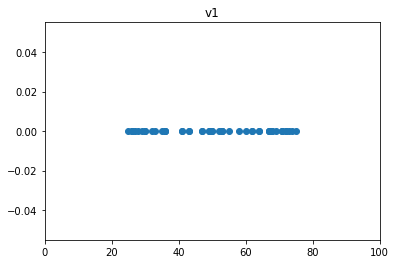

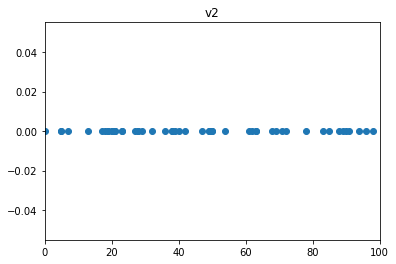

In [ ]:
# 어느 데이터의 분산이 더 클지 scatter plot을 통해 확인해 봅니다. 

plt.scatter(variance_df.v1, variance_df.zeros)
plt.xlim(0,100)
plt.title("v1")
plt.show()

plt.scatter(variance_df.v2, variance_df.zeros)
plt.xlim(0,100)
plt.title("v2")
plt.show()

In [ ]:
# df.var()를 사용해 분산 구하기
print('v1 분산 :', variance_df.v1.var())
print('v2 분산 :', variance_df.v2.var())

v1 분산 : 267.0220408163266
v2 분산 : 798.4146938775509


In [ ]:
# np.var()를 사용해 분산 구하기
print('v1 분산 :', np.var(variance_df.v1, ddof=1))
print('v2 분산 :', np.var(variance_df.v2, ddof=1))

v1 분산 : 267.0220408163266
v2 분산 : 798.4146938775509


## **1-2. 표준편차(Standard Deviation)**
- 분산의 제곱근($\sqrt{ﾠ}$) 값입니다. 
- 분산의 스케일을 조정하는 효과가 있습니다. 
- [`df.std()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html) 또는 [`np.std()`](https://numpy.org/doc/stable/reference/generated/numpy.std.html)를 사용해 구할 수 있습니다.

In [ ]:
# df.std()를 사용해 표준편차 구하기
print('v1 표준편차 :', variance_df.v1.std())
print('v2 표준편차 :', variance_df.v2.std())

v1 표준편차 : 16.340809062476882
v2 표준편차 : 28.2562328323779


In [ ]:
# np.std()를 사용해 표준편차 구하기
print('v1 표준편차 :', np.std(variance_df.v1, ddof=1))
print('v2 표준편차 :', np.std(variance_df.v2, ddof=1))

v1 표준편차 : 16.340809062476882
v2 표준편차 : 28.2562328323779


> 💡**Tip**
>
> 공식문서를 통해 `ddof` 파라미터에 대해 알아보세요. 

## **1-3.공분산(Covariance)**
- 두 변수에 대하여 한 변수가 변화할 때 다른 변수가 어떠한 연관성을 갖고 변하는지를 나타낸 값입니다. <br>
  <img src = 'https://i.imgur.com/tWPxfyI.png' width=500>
- 두 변수의 연관성이 클수록 공분산 값도 커집니다. 

> 💡**Tip**
>
> 두 변수의 스케일이 크다면 공분산 값은 어떻게 될까요? 

In [ ]:
a = b = np.arange(5, 50, 5)
c = d = np.arange(10,100,10)

data = {"a": a, "b": b, "c": c, "d": d}

df = pd.DataFrame(data)
df

,a,b,c,d
0,5,5,10,10
1,10,10,20,20
2,15,15,30,30
3,20,20,40,40
4,25,25,50,50
5,30,30,60,60
6,35,35,70,70
7,40,40,80,80
8,45,45,90,90


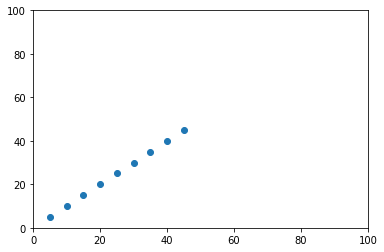

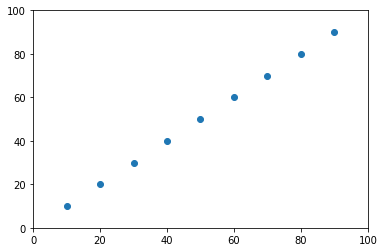

In [ ]:
# scatter plot을 통해 두 변수 간의 연관성 확인 

# a와 b의 관계 
plt.scatter(df.a, df.b)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

# c와 d의 관계 
plt.scatter(df.c, df.d)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

### **a. 분산-공분산 행렬(variance-covariance matrix)**
- 모든 변수에 대하여 분산과 공분산 값을 나타내는 정사각 행렬입니다. 
  - 주 대각선 성분은 자기 자신의 분산 값을 나타냅니다.
  - 주 대각선 이외의 성분은 가능한 두 변수의 공분산 값을 나타냅니다.
- [`df.cov()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cov.html) 또는 [`np.cov()`](https://numpy.org/doc/stable/reference/generated/numpy.cov.html)를 사용하여 구할 수 있습니다. 

In [ ]:
# df.cov()를 사용하여 공분산 행렬 나타내기 
df.cov()

,a,b,c,d
a,187.5,187.5,375.0,375.0
b,187.5,187.5,375.0,375.0
c,375.0,375.0,750.0,750.0
d,375.0,375.0,750.0,750.0


In [ ]:
# np.cov()를 사용하여 공분산 행렬 나타내기 
np.cov(df.T)

array([[187.5, 187.5, 375. , 375. ],
       [187.5, 187.5, 375. , 375. ],
       [375. , 375. , 750. , 750. ],
       [375. , 375. , 750. , 750. ]])

> 💡**Tip**
> 
> 유사한 연관성이라도, 스케일이 큰 변수들은 스케일이 작은 변수들에 비해서 높은 공분산 값을 가지게 될 것입니다.

## **1-4. 상관계수(Correlation coefficient)**
- 공분산을 두 변수의 표준편차로 나눠준 값입니다. 
  > $r_{x, y} = \frac{cov(X,Y)}{\sigma_{X}\sigma_{Y}}$
- 공분산의 스케일을 조정하는 효과가 있습니다.
- 변수의 스케일에 영향을 받지 않습니다. 
- -1에서 1 사이의 값을 가집니다. 상관계수가 1이라는 것은 한 변수가 다른 변수에 대해서 완벽한 양의 선형 관계를 갖고 있다는 것을 의미합니다. <br>
  <img src = 'https://i.imgur.com/25t6mK2.png' width=500>
- [`df.corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) 또는 [`np.corrcoef()`](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html)를 사용하여 구할 수 있습니다.





In [ ]:
# df.corr()를 사용하여 상관계수 나타내기
df.corr()

,a,b,c,d
a,1.0,1.0,1.0,1.0
b,1.0,1.0,1.0,1.0
c,1.0,1.0,1.0,1.0
d,1.0,1.0,1.0,1.0


In [ ]:
# np.corrcoef()를 사용하여 상관계수 나타내기
np.corrcoef(df.T)

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

> 💡**Tip**
- 공식문서를 통해 numpy를 사용하는 경우 df를 transpose 한 이유를 알아보세요. 
- 아래의 코드를 활용하여 상관관계를 heatmap으로 나타내는 프로세스도 한번 살펴보세요. 

In [ ]:
import seaborn as sns

# seaborn의 내장 데이터셋 - 연도별 월별 승객 수 

flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
# 월별 연도별 승객수를 집계한 피벗 테이블(pivot table)

df = flights.pivot('month', 'year', 'passengers')
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


In [ ]:
# 연도별 상관계수 

df_corr = df.corr()
df_corr

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
year,,,,,,,,,,,,
1949,1.000000,0.949435,0.944994,0.905623,0.970144,0.911553,0.908190,0.940419,0.933350,0.912513,0.901456,0.887272
1950,0.949435,1.000000,0.946923,0.957062,0.880477,0.930967,0.949866,0.938707,0.934320,0.904400,0.927191,0.887417
1951,0.944994,0.946923,1.000000,0.923131,0.939609,0.959165,0.939515,0.946961,0.946232,0.911054,0.947280,0.894268
1952,0.905623,0.957062,0.923131,1.000000,0.861005,0.942879,0.956044,0.960854,0.963146,0.960107,0.962860,0.925008
1953,0.970144,0.880477,0.939609,0.861005,1.000000,0.913945,0.884986,0.929524,0.928578,0.907120,0.902622,0.894288
1954,0.911553,0.930967,0.959165,0.942879,0.913945,1.000000,0.989433,0.984947,0.986983,0.962541,0.988882,0.965944
1955,0.908190,0.949866,0.939515,0.956044,0.884986,0.989433,1.000000,0.985527,0.982708,0.961328,0.984109,0.974451
1956,0.940419,0.938707,0.946961,0.960854,0.929524,0.984947,0.985527,1.000000,0.997125,0.983194,0.983704,0.977851
1957,0.933350,0.934320,0.946232,0.963146,0.928578,0.986983,0.982708,0.997125,1.000000,0.986762,0.988408,0.977076


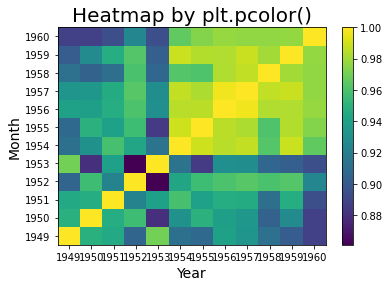

In [ ]:
# matplotlib을 이용한 히트맵 그리기 (Heatmap by matplotlib)

plt.pcolor(df_corr)
plt.xticks(np.arange(0.5, len(df_corr.columns), 1), df_corr.columns)
plt.yticks(np.arange(0.5, len(df_corr.index), 1), df_corr.index)
plt.title('Heatmap by plt.pcolor()', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.colorbar()

plt.show()

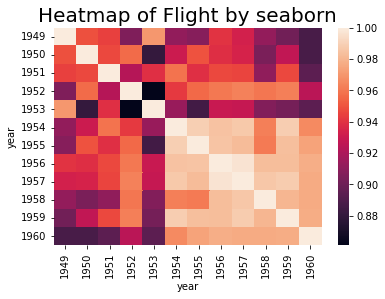

In [ ]:
# seaborn을 이용한 히트맵 그리기 (Heatmap by seaborn)

ax = sns.heatmap(df_corr)
plt.title('Heatmap of Flight by seaborn', fontsize=20)
plt.show() 

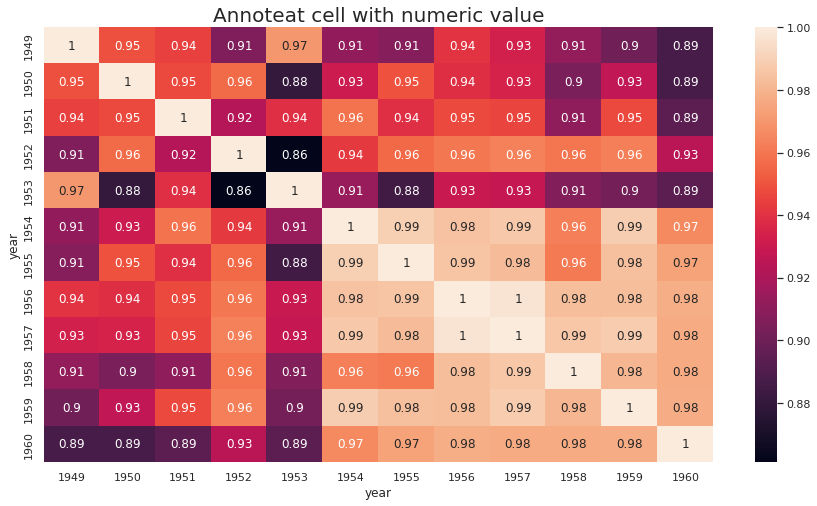

In [ ]:
# annot=True argument를 써서 각 셀에 숫자를 입력(annotate each cell with numeric value)

sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df_corr, annot=True)
plt.title('Annoteat cell with numeric value', fontsize=20)
plt.show()

In [ ]:
# pandas를 이용한 히트맵 그리기 (Heatmap by pandas)

df_corr.style.background_gradient(cmap='summer')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
year,,,,,,,,,,,,
1949,1.000000,0.949435,0.944994,0.905623,0.970144,0.911553,0.908190,0.940419,0.933350,0.912513,0.901456,0.887272
1950,0.949435,1.000000,0.946923,0.957062,0.880477,0.930967,0.949866,0.938707,0.934320,0.904400,0.927191,0.887417
1951,0.944994,0.946923,1.000000,0.923131,0.939609,0.959165,0.939515,0.946961,0.946232,0.911054,0.947280,0.894268
1952,0.905623,0.957062,0.923131,1.000000,0.861005,0.942879,0.956044,0.960854,0.963146,0.960107,0.962860,0.925008
1953,0.970144,0.880477,0.939609,0.861005,1.000000,0.913945,0.884986,0.929524,0.928578,0.907120,0.902622,0.894288
1954,0.911553,0.930967,0.959165,0.942879,0.913945,1.000000,0.989433,0.984947,0.986983,0.962541,0.988882,0.965944
1955,0.908190,0.949866,0.939515,0.956044,0.884986,0.989433,1.000000,0.985527,0.982708,0.961328,0.984109,0.974451
1956,0.940419,0.938707,0.946961,0.960854,0.929524,0.984947,0.985527,1.000000,0.997125,0.983194,0.983704,0.977851
1957,0.933350,0.934320,0.946232,0.963146,0.928578,0.986983,0.982708,0.997125,1.000000,0.986762,0.988408,0.977076



# **Part 2. 선형대수(Linear Algebra) +**

## **2-1. Vector Transformation**
- 임의의 벡터 $[x_1, x_2]$는 함수(행렬) $f$에 의해 $[{x_1}', {x_2}']$으로 변환될 수 있습니다.
  > $f(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} {x_1}' \\ {x_2}' \\  \end{bmatrix}$
- 벡터의 변환은 벡터와 행렬 $T$의 곱으로 이루어집니다. 
  > $T\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = \begin{bmatrix} {x_1}' \\ {x_2}' \\  \end{bmatrix} → \begin{bmatrix} 2 & 1 \\ 1 & -3 \end{bmatrix}\begin{bmatrix} 3 \\ 4 \end{bmatrix} = \begin{bmatrix} 10 \\ -9 \end{bmatrix}$

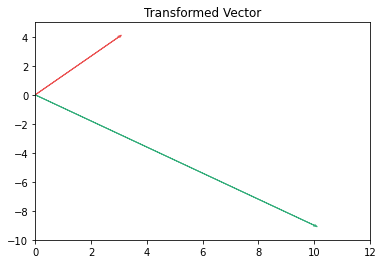

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

input_vector = np.array([3, 4])
transform_matrix = np.array([[2, 1], [1, -3]])
output_vector = np.matmul(transform_matrix, input_vector)# [10, -9] 

plt.xlim(0, 12)
plt.ylim(-10, 5)

plt.arrow(0, 0, input_vector[0], input_vector[1], head_width = .1, color ='#EB5353')
plt.arrow(0, 0, output_vector[0], output_vector[1], head_width = .1, color ='#36AE7C')
plt.title("Transformed Vector")
plt.show()

## **2-2. Eigenstuff**

### **a. Eigenvector**
- 주어진 transformation에 의해서 크기만 변하고 방향은 변하지 않는 벡터입니다.
  - 지구의 자전을 예로 들자면, 회전 변환시에 방향이 바뀌지 않는 자전축이 Eigenvector에 해당합니다.

### **b. Eigenvalue** 
- Eigenvector의 변화한 크기 값입니다. 

  > $T(v) = \lambda v \quad$ where $\ v$ : eigenvector , $\lambda$ : eigenvalue
  >
  > $T \cdot v = v' = \lambda \cdot v$

- Eigenstuff는 [`np.linalg.eig()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)을 사용하여 구할 수 있습니다. 

In [ ]:
# np.linalg.eig()을 사용하여 eigenstuff 구하기 
testMat = np.array([[2,1],[1,2]])
testMat

array([[2, 1],
       [1, 2]])

In [ ]:
eigenstuff = np.linalg.eig(testMat)
eigenstuff

(array([3., 1.]), array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [ ]:
# 첫 번째 eigenstuff 확인
np.matmul(testMat, eigenstuff[1][:,0])

array([2.12132034, 2.12132034])

In [ ]:
np.multiply(eigenstuff[0][0], eigenstuff[1][:,0])

array([2.12132034, 2.12132034])

In [ ]:
# 두 번째 eigenstuff 확인 
np.matmul(testMat, eigenstuff[1][:,1])

array([-0.70710678,  0.70710678])

In [ ]:
np.multiply(eigenstuff[0][1], eigenstuff[1][:,1])

array([-0.70710678,  0.70710678])

In [ ]:
# eigenvector의 크기 
np.dot(eigenstuff[1][:,0], eigenstuff[1][:,0])

0.9999999999999998

In [ ]:
np.dot(eigenstuff[1][:,1], eigenstuff[1][:,1])

0.9999999999999998

> 💡**Tip**
- Eigenvector와 Eigenvalue는 항상 쌍을 이룹니다. 
- 일반적으로 Eigenvector는 단위벡터입니다.
  - 단위벡터는 크기가 1인 벡터입니다. 
- Eigenstuff는 행렬 $T$의 column 수만큼 존재합니다. 

# **Part 3. PCA**
vector transformation은 결국 데이터를 변환하기 위한 단계입니다. <br> 
데이터를 변환하는 방법은 무한대에 가까운데 그렇다면 데이터를 왜, 어떻게 변환하는 것일까요? <br>
이때 eigenstuff는 어디에 필요할까요? <br>


## **3-1. 고차원의 문제(The Curse of Dimensionality; 차원의 저주)**

Feature(column) 수가 많은 데이터셋의 분석 및 모델링에서 다음과 같은 문제점들이 발생할 수 있습니다. 
- 고차원 데이터를 분석하기 위한 더 복잡한 시각화 
  - 일반적으로 4차원 이상의 데이터는 시각화가 불가능합니다. <br>
  <img src='https://mathworld.wolfram.com/images/eps-gif/HypercubeGraphUnitDistance_1000.gif' width = 600>
  - [pair plot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) $\rightarrow$ 상당히 많은 양의 불필요한 scattor plot 생성 
- 비효율성
  - 시간이 오래 걸립니다.
  - 데이터를 사용하기 위해 들이는 리소스에 비해 결과가 그다지 좋아지지는 않습니다.
  - 데이터의 일부를 제한하더라도 의미 파악에는 큰 차이가 없다면, feature를 더 사용하는 것이 비효율적입니다.
- Overfitting(과적합)
  - 훈련 데이터에 대해서는 과하게 학습하여 오차가 감소하지만 실제 데이터에 대해서는 오차가 증가합니다. 

## **3-2. 차원 축소(Dimensionality Reduction)**
정보 손실은 최소화(가능한 많은 정보를 포함)하면서 중요한 변수만 선택할 수 있다면 어떨까요? <br> 
머신러닝에서는 이를 위한 다양한 차원 축소 기술들을 연구 중입니다. 

### **a. Feature selection**

- 데이터셋에서 덜 중요한 feature는 제거하는 방법입니다. 
- 분석 목적에 적합한 소수의 기존 feature를 선택합니다. 
- feature의 해석이 쉽다는 장점이 있습니다. 
- feature 간 연관성을 직접 고려해야 합니다. 

### **b. Feature extraction**

- 기존 feature를 조합하여 사용합니다.
- feature 간 상관관계를 고려하여 조합합니다. 
  - 새로운 feature가 추출(생성)됩니다. 
  - 원래 변수들의 선형결합으로 이루어집니다. <br>
  ex) 집값 데이터셋에서 `집 면적`, `방 개수`, `화장실 개수`를 나타내는 변수를 조합하여 `크기`라는 하나의 변수를 사용합니다. 
- feature의 해석이 어렵습니다. 
- feature 수를 많이 줄일 수 있습니다. 

<img src = 'https://i.imgur.com/d4wIeJL.png' width=500>

> 💡**Tip**
>
> PCA는 차원 축소 중 어느 방법을 따를까요? 

## **3-3. 주성분 분석(Principal Component Analysis, PCA)**
- 원래 데이터의 정보(분산)를 최대한 보존하는 새로운 축을 찾고, 그 축에 데이터를 사영(Linear Projection)하여 고차원의 데이터를 저차원으로 변환하는 기법입니다. 
  - 주성분(PC)은 기존 데이터의 분산을 최대한 보존하도록 데이터를 projection 하는 축입니다. 
  - PC의 단위벡터는 데이터의 공분산 행렬에 대한 eigenvector입니다. <br>
    (수학적으로 복잡한 증명 과정을 거치므로 증명은 생략합니다.)
  - eigenvector에 projection한 데이터의 분산이 eigenvalue입니다.
- Feature Extraction 방식 중 하나로, 기존 변수의 선형결합으로 새로운 변수(PC)를 생성합니다. 

### **a. PCA Process**
PCA가 이루어지는 과정은 다음과 같습니다. 

- **데이터셋 불러오기**

In [ ]:
X = np.array([ 
              [0.2, 5.6, 3.56], 
              [0.45, 5.89, 2.4],
              [0.33, 6.37, 1.95],
              [0.54, 7.9, 1.32],
              [0.77, 7.87, 0.98]
])
print("Data(X): \n")
pd.DataFrame(X)

Data(X): 



,0,1,2
0,0.20,5.60,3.56
1,0.45,5.89,2.40
2,0.33,6.37,1.95
3,0.54,7.90,1.32
4,0.77,7.87,0.98


- **데이터 표준화하기** <br>
  표준화 : 각 열에 대해 평균을 빼고 표준편차로 나누어서 데이터를 평균 0, 표준편차 1로 scaling 하는 것

In [ ]:
standardized_data = ( X - np.mean(X, axis = 0) ) / np.std(X, ddof=1, axis = 0)
print("\n Standardized Data: \n", standardized_data)


 Standardized Data: 
 [[-1.19298785 -1.0299848   1.5011907 ]
 [-0.03699187 -0.76471341  0.35403575]
 [-0.59186994 -0.32564351 -0.09098125]
 [ 0.37916668  1.07389179 -0.71400506]
 [ 1.44268298  1.04644992 -1.05024014]]


- **표준화한 데이터셋의 공분산행렬 구하기**

In [ ]:
covariance_matrix = np.cov(standardized_data.T)
print("\n Covariance Matrix: \n", covariance_matrix)


 Covariance Matrix: 
 [[ 1.          0.84166641 -0.88401004]
 [ 0.84166641  1.         -0.91327498]
 [-0.88401004 -0.91327498  1.        ]]


- **공분산행렬의 Eigenstuff 구하기** <br>
  공분산행렬의 eigencvector와 eigenvalue는 쌍을 이루며, 그 수는 feature 수와 동일합니다. 


In [ ]:
values, vectors = np.linalg.eig(covariance_matrix)
print("\n Eigenvalues: \n", values)
print("\n Eigenvectors: \n", vectors)


 Eigenvalues: 
 [2.75962684 0.1618075  0.07856566]

 Eigenvectors: 
 [[ 0.56991376  0.77982119  0.25899269]
 [ 0.57650106 -0.60406359  0.55023059]
 [-0.58552953  0.16427443  0.7938319 ]]


- **데이터를 eigenvector에 projection 하기**
  - PCA는 데이터를 축에 수직으로 projection하는 것인데, eigenvector는 이 축의 단위벡터입니다. 
  - linear projection<br>
  <img src = 'https://i.imgur.com/pC5zjKe.png' width=600> <br>
  위 식에서 변환된 데이터를 $w'$, 기존 데이터를 $w$, eigenvector를 $v$라 할 때, $v\cdot v$는 1이므로 $w\cdot v$는 $w'$이 $v$에서 어디쯤 위치하는지 나타내주는 스칼라값과 같습니다. 
  - 이에 따라 projection 된 데이터는 기존 데이터와 eigenvector의 내적과 같습니다.

In [ ]:
# eigenvector는 크기가 1인 단위벡터 
print('pc1의 크기:', np.dot(vectors[:,0], vectors[:,0]))
print('pc2의 크기:', np.dot(vectors[:,1], vectors[:,1]))
print('pc3의 크기:', np.dot(vectors[:,2], vectors[:,2]))

pc1의 크기: 0.9999999999999998
pc2의 크기: 1.0000000000000002
pc3의 크기: 1.0


In [ ]:
# 데이터의 첫 row를 각각의 eigenvector에 projection하여 변환한 데이터 

pc_1 = np.dot(standardized_data[0], vectors[:,0])
pc_2 = np.dot(standardized_data[0], vectors[:,1])
pc_3 = np.dot(standardized_data[0], vectors[:,2])

print(pc_1, pc_2, pc_3)

-2.152679012186683 -0.06153364425582605 0.3159887819011157


In [ ]:
# 행렬곱을 이용하여 모든 데이터를 eigenvector에 projection하여 변환

Z = np.matmul(standardized_data, vectors)

print("\n Projected Data(Z): \n")
pd.DataFrame(Z, columns=['pc1', 'pc2', 'pc3'])


 Projected Data(Z): 



,pc1,pc2,pc3
0,-2.152679,-0.061534,0.315989
1,-0.669239,0.491248,-0.149304
2,-0.471776,-0.279789,-0.404693
3,1.253263,-0.470309,0.122290
4,2.040431,0.320385,0.115719


> 💡**Tip**
>
> 차원 축소를 했는데 Projected Data가 왜 기존 Data와 똑같은 3차원일까요? <br>
> PCA는 고차원의 데이터를 분산을 유지하는 축 (PC)을 기반으로 데이터를 변환한 것이며 해당 PC들 중 일부를 사용하는 것으로 차원 축소를 할 수 있습니다. <br>
> 즉, 데이터 $X$가 $Z$로 변환되었고, 이 중 `pc1`, `pc2`를 사용하면 2차원으로 축소한 의미가 있는 것이죠.



### **b. sklearn을 사용하여 PCA 시행**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

print("Data: \n", X)

# StandardScaler()를 사용하여 데이터 표준화 
scaler = StandardScaler()
Z = scaler.fit_transform(X)
print("\n Standardized Data: \n", Z)

# 표준화한 데이터에 대하여 pca 시행 
pca = PCA() 
pca.fit(Z)

print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)

B = pca.transform(Z)
print("\n Projected Data: \n", B)

Data: 
 [[0.2  5.6  3.56]
 [0.45 5.89 2.4 ]
 [0.33 6.37 1.95]
 [0.54 7.9  1.32]
 [0.77 7.87 0.98]]

 Standardized Data: 
 [[-1.33380097 -1.15155802  1.67838223]
 [-0.04135817 -0.85497558  0.395824  ]
 [-0.66173071 -0.36408051 -0.10172014]
 [ 0.42392124  1.20064752 -0.79828193]
 [ 1.61296861  1.16996658 -1.17420417]]

 Eigenvectors: 
 [[-0.56991376 -0.57650106  0.58552953]
 [ 0.77982119 -0.60406359  0.16427443]
 [-0.25899269 -0.55023059 -0.7938319 ]]

 Eigenvalues: 
 [3.44953356 0.20225937 0.09820707]

 Projected Data: 
 [[ 2.4067683  -0.06879671 -0.3532862 ]
 [ 0.74823156  0.5492314   0.16692746]
 [ 0.5274621  -0.31281387  0.45246034]
 [-1.40119076 -0.525822   -0.13672384]
 [-2.2812712   0.35820117 -0.12937776]]


> 💡**Tip**
>
> **a**와 **b**에서 구한 표준화한 데이터 값의 차이는 standard deviation에 쓰이는 자유도(ddof)가 1인지 0인지에 따라 발생한 것으로 data science에서는 해당 차이를 critical 하지 않은 것으로 봅니다. 

## **3-4. Scree Plots**
- 주성분의 분산을 표시한 그림입니다. <br>
  - explained variance(eigenvector로 투영했을 때의 분산=eigenvalue) 혹은 explained variance ratio를 이용하여 주성분들의 상대적인 중요도를 보여줍니다.
- PCA를 몇 차원으로 해야할지 선택할 때, 하나의 기준이 될 수 있습니다. 

<img src = 'https://i.imgur.com/h8C6Iqz.png' width=400>
<img src = 'https://i.imgur.com/AkwezXq.png' width=400>


In [ ]:
# 분산 비율 
pca.explained_variance_ratio_

array([0.91987561, 0.05393583, 0.02618855])

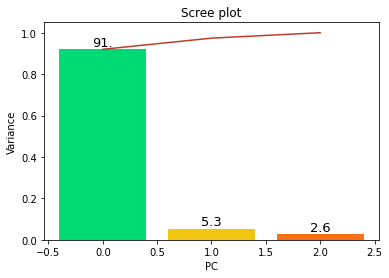

In [ ]:
# scree plot으로 나타내는 함수 정의 
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
  
scree_plot(pca)

In [ ]:
# 1개의 pc만 출력
pca = PCA(1) 
pca.fit(Z)

B = pca.transform(Z)
print("\n Projected Data(Z): \n")
pd.DataFrame(B, columns=['pc1'])


 Projected Data(Z): 



,pc1
0,2.406768
1,0.748232
2,0.527462
3,-1.401191
4,-2.281271


# **Part 4. Introduction to Machine Learning**

머신러닝 알고리즘 종류는 다음과 같이 다양합니다.

<img src='https://i.imgur.com/FKzlBos.jpg' width = 1000>

이 중에서 대표적인 머신러닝 알고리즘인 **지도 학습**과 **비지도 학습**을 중심으로 살펴보도록 하겠습니다.



## **4-1. 지도 학습 (Supervised Learning)** 

지도 학습 알고리즘은 예를 통해 학습하도록 설계됩니다. <br>
분석가인 여러분들이 문제에 대한 답을 알고 있고, 머신러닝 모델이 그것을 알아낼 수 있도록 훈련시키고자 할 때 사용합니다. <br>
즉, 지도 학습은 학습 데이터에 Label, 답이 있을 때 사용할 수 있습니다.

지도 학습에는 회귀와 분류라는 두 가지 종류가 존재합니다. 다음 예를 통해 두 종류의 차이를 알아보도록 합니다. 

<p align="center">
<img src='https://i.imgur.com/RyThpwE.png' width = 500>

  - **회귀 (Regression)** </br>
  회귀 알고리즘은 데이터의 feature를 바탕으로 continuous한 target(주로 패턴이나 트랜드, 경향)을 예측할 때 사용됩니다. </br>
   - e.g. 주택 가격 예측, 강수량 예측


  - **분류 (Classification)** </br>
  분류 알고리즘은 주어진 target의 카테고리 혹은 클래스 예측을 위해 사용됩니다.
    - 이진 분류 (Binary Classification): 맞다/아니다와 같이 target의 클래스가 2개인 경우
      - e.g. 스팸 메일 여부 예측, 코로나 확진 여부 예측

    - 다중 분류 (Multi-class Classification): target의 클래스가 3개 이상인 경우
      - e.g. 가위바위보 예측



> **💡 Tip** <br>
모델 학습에 사용하는 column을 `feature`, label이 들어있는 column을 `target`이라고 표현합니다.

## **4-2. 비지도 학습 (Unsupervised Learning)**
비지도 학습은 지도 학습과 달리 **label이 없는 데이터**에서 숨겨진 구조와 패턴을 탐색적으로 발견하는 것입니다. <br>
즉, 정답이 없는 데이터로부터 패턴이나 형태를 찾아야 하기 때문에 지도학습보다는 조금 더 난이도가 있다고 할 수 있으며, 예측의 문제 보다는 주로 **현상의 기술(Description)이나 특징 도출, 패턴 도출** 등의 문제에 사용됩니다.

실제로 지도 학습에서 적절한 feature를 찾아내기 위한 전처리 방법으로 비지도 학습을 이용하기도 합니다.

<p align="center">
<img src='https://i.imgur.com/RbVlVUy.png' width = 200>

- **클러스터링 (Clustering)** </br>
  데이터의 연관된 feature를 바탕으로 유사한 그룹을 생성합니다.

- **차원 축소 (Dimensionality Reduction)** </br>
  높은 차원을 갖는 데이터셋을 사용하여 feature selection / extraction 등을 통해 차원을 줄이는 방법입니다. <br>
  이번 note에서 다룬 PCA 또한 차원 축소의 방법 중 하나입니다.


- **연관 규칙 학습 (Association Rule Learning)** </br>
  데이터셋의 item 간의 관계를 `If - Then` 형식으로 찾아나가는 rule-based 방법입니다. (feature-output 의 관계가 아닌 feature-feature)